<a href="https://colab.research.google.com/github/shimiiizu/image-processing/blob/master/Analyze01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [0]:
df1 = pd.read_csv('/content/PL.csv', header=0, index_col=1, encoding='shift_jis')
df1.head(3)

FileNotFoundError: ignored

# XBRLデータの読み込み

## 四半期毎の売り上げデータを抜き出し

In [0]:
df1.loc[:,['SALES_q']].tail(3)

,SALES_q
date,
2018-09-30 00:00:00,4.038442e+09
2018-12-31 00:00:00,3.431718e+09
2019-03-31 00:00:00,3.487407e+09


## インデックスを時間の型に変換

In [0]:
time1=pd.to_datetime(df1.index)
time1

DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31',
               '2017-06-30', '2017-09-30', '2017-12-31', '2018-03-31',
               '2018-06-30', '2018-09-30', '2018-12-31', '2019-03-31'],
              dtype='datetime64[ns]', name='date', freq=None)

## 時間型に変換したインデックスを挿入

In [0]:
df1.index= time1

In [0]:
df1.index

DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-31', '2017-03-31',
               '2017-06-30', '2017-09-30', '2017-12-31', '2018-03-31',
               '2018-06-30', '2018-09-30', '2018-12-31', '2019-03-31'],
              dtype='datetime64[ns]', name='date', freq=None)

# 株価データの読み込み

In [0]:
df_2018 = pd.read_csv('/content/2931_2018.csv', header=1, index_col=['日付'], encoding='shift_jis')

df_2018.columns

Index(['始値', '高値', '安値', '終値', '出来高', '終値調整値'], dtype='object')

## データフレームの結合

In [0]:
df_2019 = pd.read_csv('/content/2931_2019.csv', header=1, index_col=['日付'], encoding='shift_jis')
df_2017 = pd.read_csv('/content/2931_2017.csv', header=1, index_col=['日付'], encoding='shift_jis')
df_2016 = pd.read_csv('/content/2931_2016.csv', header=1, index_col=['日付'], encoding='shift_jis')


df=pd.concat([df_2016,df_2017,df_2018,df_2019],axis = 0)

df.head(3)

,始値,高値,安値,終値,出来高,終値調整値
日付,,,,,,
2016-01-04,1816,1830,1780,1781,719200,1781
2016-01-05,1779,1800,1751,1778,591800,1778
2016-01-06,1792,1810,1773,1785,712700,1785


## インデックスを時間の型に変換

In [0]:
time = pd.to_datetime(df.index)
time

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-12', '2016-01-13', '2016-01-14',
               '2016-01-15', '2016-01-18',
               ...
               '2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
               '2019-07-05', '2019-07-08', '2019-07-09', '2019-07-10',
               '2019-07-11', '2019-07-12'],
              dtype='datetime64[ns]', name='日付', length=861, freq=None)

## 時間型に変換したインデックスを挿入

In [0]:
df.index=time
df.head(3)

,始値,高値,安値,終値,出来高,終値調整値
日付,,,,,,
2016-01-04,1816,1830,1780,1781,719200,1781
2016-01-05,1779,1800,1751,1778,591800,1778
2016-01-06,1792,1810,1773,1785,712700,1785


In [0]:
df_2018.index

DatetimeIndex(['2018-01-04', '2018-01-05', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12', '2018-01-15', '2018-01-16',
               '2018-01-17', '2018-01-18',
               ...
               '2018-12-14', '2018-12-17', '2018-12-18', '2018-12-19',
               '2018-12-20', '2018-12-21', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='日付', length=245, freq=None)

## 株価をグラフ化

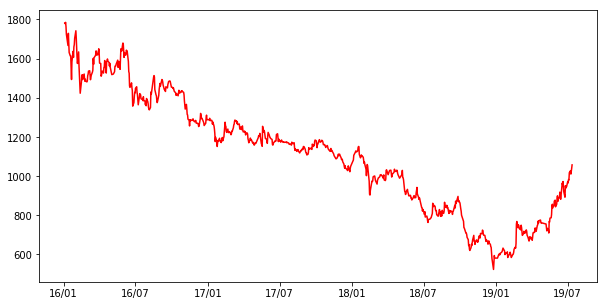

In [0]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(df.index,df['終値'],c='red')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))

## 四半期の売上をグラフ化

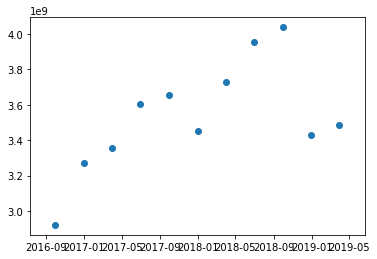

In [0]:
plt.scatter(df1.index,df1['SALES_q'])

## 株価と四半期の売上を同じグラフでグラフ化

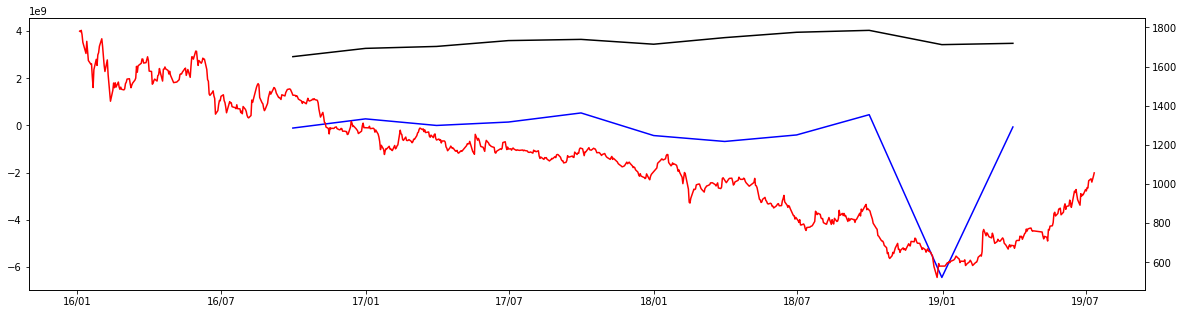

In [0]:

fig, ax1 = plt.subplots(figsize=(20, 5))

ax1.plot(df1.index,df1['SALES_q'],c='black')
ax1.plot(df1.index,df1['OperatingIncome_q'],c='blue')


ax2 = ax1.twinx()  

ax2.plot(df.index, df['終値'],c='red')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%y/%m'))


## データフレームdfとdf1を結合する

In [0]:
df3= pd.concat([df,df1],axis=0,sort=False)
df3.head(3)

,始値,高値,安値,終値,出来高,終値調整値,Unnamed: 0,Quater,company_name,SALES_q,OperatingIncome_q,OrdinaryIncome_q,NetIncome_q,SALES,OperatingIncome,OrdinaryIncome,NetIncome
2016-01-04,1816.0,1830.0,1780.0,1781.0,719200.0,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,1779.0,1800.0,1751.0,1778.0,591800.0,1778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,1792.0,1810.0,1773.0,1785.0,712700.0,1785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## df3の形

In [0]:
df3.shape

(873, 17)

補完

In [0]:
df4=df3.resample('D').mean()
df4.head()

,始値,高値,安値,終値,出来高,終値調整値,SALES_q,OperatingIncome_q,OrdinaryIncome_q,NetIncome_q,SALES,OperatingIncome,OrdinaryIncome,NetIncome
2016-01-04,1816.0,1830.0,1780.0,1781.0,719200.0,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,1779.0,1800.0,1751.0,1778.0,591800.0,1778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,1792.0,1810.0,1773.0,1785.0,712700.0,1785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,1785.0,1800.0,1761.0,1763.0,668000.0,1763.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,1750.0,1760.0,1717.0,1724.0,930200.0,1724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 線形補完

In [0]:
df5=df4.interpolate()
df5.head(3)

,始値,高値,安値,終値,出来高,終値調整値,SALES_q,OperatingIncome_q,OrdinaryIncome_q,NetIncome_q,SALES,OperatingIncome,OrdinaryIncome,NetIncome
2016-01-04,1816.0,1830.0,1780.0,1781.0,719200.0,1781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,1779.0,1800.0,1751.0,1778.0,591800.0,1778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,1792.0,1810.0,1773.0,1785.0,712700.0,1785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 表示

In [0]:
df5['SALES_q'] .head(3)

2016-01-04   NaN
2016-01-05   NaN
2016-01-06   NaN
Freq: D, Name: SALES_q, dtype: float64

In [0]:
df5['終値'].head(3)

2016-01-04    1781.0
2016-01-05    1778.0
2016-01-06    1785.0
Freq: D, Name: 終値, dtype: float64

## グラフ化

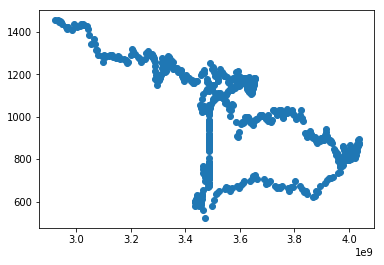

In [0]:
plt.scatter(df5['SALES_q'],df4['終値'])
#plt.ylim(0, 5000)
#plt.xlim(0, 10000000000)